In [1]:
from IPython.display import Latex

In [2]:
import ast

In [3]:
import showast

In [4]:
ast.dump(ast.parse("x_as"))

"Module(body=[Expr(value=Name(id='x_as', ctx=Load()))])"

In [5]:
class Latexify(ast.NodeVisitor):
    def visit_Module(self, node):
        return list(map(self.visit, node.body))
    
    def visit_Expr(self, node):
        return self.visit(node.value)  
    
    def visit_Name(self, node):
#         print("Visited ", node.id)
        return str(node.id)

In [6]:
Latex(Latexify().visit(ast.parse("x"))[0])

<IPython.core.display.Latex object>

In [7]:
Latex(r"""$x^{a}$""")

<IPython.core.display.Latex object>

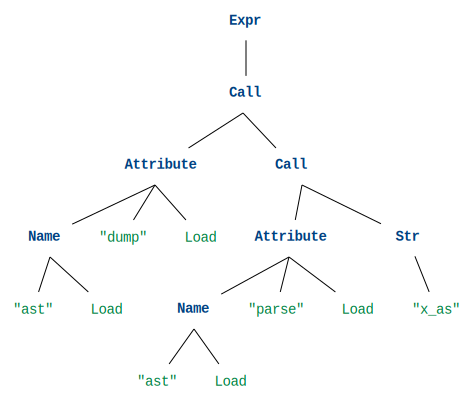

In [9]:
%%showast
ast.dump(ast.parse("x_as"))